In [32]:
from sklearn import datasets
import numpy as np

import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))


iris = datasets.load_iris()
print(type(iris))
X = iris.data[:, [2,3]]
Y = iris.target

print("X type:", type(X), "X shape:", X.shape, "X ndim:", np.ndim(X))
print("Y type:", type(Y), "Y shape:", Y.shape, "Y ndim:", np.ndim(Y))
print("class lables:", np.unique(Y))

The scikit-learn version is 0.21.3.
<class 'sklearn.utils.Bunch'>
X type: <class 'numpy.ndarray'> X shape: (150, 2) X ndim: 2
Y type: <class 'numpy.ndarray'> Y shape: (150,) Y ndim: 1
class lables: [0 1 2]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 1,stratify=Y)

In [28]:
print("Y label count:", np.bincount(Y))
print("Y train label count:", np.bincount(Y_train))
print("Y test label count:", np.bincount(Y_test))

Y label count: [50 50 50]
Y train label count: [35 35 35]
Y test label count: [15 15 15]


In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test) # 테스트 셋도 훈련셋에 맞춰서 동일하게 표준화하도록 한것

In [30]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.01, tol=1e-3, random_state=1)
ppn.fit(X_train_std, Y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
Y_pred = ppn.predict(X_test_std)
print("Error sample count: %d" % (Y_test != Y_pred).sum())

Error sample count: 2


In [34]:
from sklearn.metrics import accuracy_score
print("accuracy score: %.2f" % accuracy_score(Y_test, Y_pred))

acuracy score: 0.96


In [36]:
print('accuracy: %.2f' % ppn.score(X_test_std, Y_test))

accuracy: 0.96


In [37]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    X1_min, X1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    X2_min, X2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(X1_min, X1_max, resolution),
                              np.arange(X2_min, X2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
    if test_idx:
        X_test, Y_test = X[test_idx, :], Y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='test set')

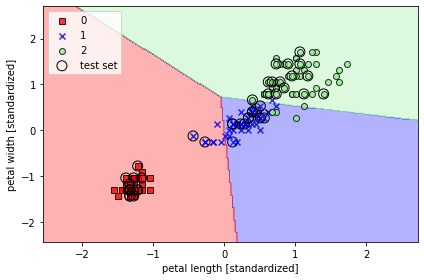

In [38]:
X_combined_std = np.vstack((X_train_std, X_test_std))
Y_combined = np.hstack((Y_train, Y_test))
plot_decision_regions(X=X_combined_std,
                     y=Y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()